In [1]:
# import zeep
# import numpy as np
# import math
# import time
# import tensorflow as tf

# import matplotlib.pyplot as plt

# from tensorflow import estimator
# from tensorflow import keras
# from tensorflow.keras.utils import *
# from tensorflow.keras import Sequential
# from tensorflow.keras.layers import Dense

# from sklearn.model_selection import train_test_split

# from tensorflow.compat.v1.keras import backend as K

# import tensorflow_probability as tfp

In [2]:
import zeep
import numpy as np
import math
import time

import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

from tensorflow.compat.v1 import estimator

from tensorflow import keras
from tensorflow.compat.v1.keras.utils import *
from tensorflow.compat.v1.keras import Sequential
from tensorflow.compat.v1.keras.layers import Dense

import matplotlib as mpl
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from tensorflow.compat.v1.keras import backend as K
import tensorflow_probability as tfp

C:\Users\USER\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\USER\anaconda3\lib\site-packages\numpy\.libs\libopenblas.GK7GX5KEQ4F6UYO3P26ULGBQYHGQO7J4.gfortran-win_amd64.dll
C:\Users\USER\anaconda3\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


Instructions for updating:
non-resource variables are not supported in the long term


In [21]:
cubes = [102]
grad_data = np.array([]).reshape(0,9)
SGS_data = np.array([]).reshape(0,9)
for i in cubes:
    grad_line = "grad_data = np.vstack([grad_data,np.load('cube_" + str(i) + "_grad.npy')])"
    SGS_line = "SGS_data = np.vstack([SGS_data,np.load('cube_" + str(i) + "_SGS.npy')])"
    
    exec(grad_line)
    exec(SGS_line)

In [4]:
# grad_data_rot_1 = grad_data[:, [4, 3, 5, 1, 0, 2, 7, 6, 8]]
# SGS_data_rot_1 = SGS_data[:, [1, 0, 2, 3, 5, 4]]

# grad_data_rot_2 = grad_data[:, [0, 2, 1, 6, 8, 7, 3, 5, 4]]
# SGS_data_rot_2 = SGS_data[:, [0, 2, 1, 4, 3, 5]]

# grad_data_rot_3 = grad_data[:, [4, 5, 3, 7, 8, 6, 1, 2, 0]]
# SGS_data_rot_3 = SGS_data[:, [1, 2, 0, 5, 4, 3]]

# grad_data_rot_4 = grad_data[:, [8, 6, 7, 2, 0, 1, 5, 3, 4]]
# SGS_data_rot_4 = SGS_data[:, [2, 0, 1, 4, 5, 3]]

# grad_data_rot_5 = grad_data[:, [8, 7, 6, 5, 4, 3, 2, 1, 0]]
# SGS_data_rot_5 = SGS_data[:, [2, 1, 0, 5, 4, 3]]

# print(np.shape(grad_data))
# grad_data = np.concatenate((grad_data, grad_data_rot_1, grad_data_rot_2, grad_data_rot_3, grad_data_rot_4, grad_data_rot_5))
# SGS_data = np.concatenate((SGS_data, SGS_data_rot_1, SGS_data_rot_2, SGS_data_rot_3, SGS_data_rot_4, SGS_data_rot_5))
# print(np.shape(grad_data))

In [5]:
# cubes = [1,3,4]
# grad_data = np.array([]).reshape(0,12)
# SGS_data = np.array([]).reshape(0,6)
# for i in cubes:
#     grad_line = "grad_data = np.vstack([grad_data,np.load('cube_" + str(i) + "_grad_p.npy')])"
#     SGS_line = "SGS_data = np.vstack([SGS_data,np.load('cube_" + str(i) + "_SGS.npy')])"
    
#     exec(grad_line)
#     exec(SGS_line)

In [22]:
# print('Input Data Size:')
# print(np.shape(grad_data))
# print('Output Data Size:')
# print(np.shape(SGS_data))

print('min and max input before scaling:')
print(np.amin(grad_data,0))
print(np.amax(grad_data,0))

print('min and max output before scaling:')
print(np.amin(SGS_data,0))
print(np.amax(SGS_data,0))

# x_grad_offset = -25
# x_grad_scale = 50

# y_SGS_offset = -1.1
# y_SGS_scale = 2.2

# x_grad_offset = 0
# x_grad_scale = [15,20,25,22,18,20,22,23,18]

# y_SGS_offset = [-0.5,-0.5,-0.5,0,0,0]
# y_SGS_scale = [0.5,0.55,0.5,0.4,0.4,0.4]

SGS_data_6 = np.zeros((np.shape(SGS_data)[0],6))
SGS_data_6[:,0] = SGS_data[:,0]
SGS_data_6[:,1] = SGS_data[:,4]
SGS_data_6[:,2] = SGS_data[:,8]
SGS_data_6[:,3] = SGS_data[:,1]
SGS_data_6[:,4] = SGS_data[:,2]
SGS_data_6[:,5] = SGS_data[:,5]

x_grad_offset = 0
x_grad_scale = 1

y_SGS_offset = 0
y_SGS_scale = 1

x = grad_data - x_grad_offset
x = x / x_grad_scale

y = SGS_data_6 - y_SGS_offset
y = y / y_SGS_scale

print('Input Data Size:')
print(np.shape(x))
print('Output Data Size:')
print(np.shape(y))

# y = SGSsym

# x = (x-x.mean(axis = 0))/x.std(axis = 0)
# y = (y-y.mean(axis = 0))/y.std(axis = 0)

print('min and max input after scaling:')
print(np.amin(x,0))
print(np.amax(x,0))

print('min and max output after scaling:')
print(np.amin(y,0))
print(np.amax(y,0))

min and max input before scaling:
[-6.82657188 -5.96953919 -8.34862947 -8.37744148 -7.85188044 -7.40977914
 -5.37161745 -8.7759126  -7.70503425]
[ 8.46719275  5.61854389  6.80825614  9.28558754 14.13847633  5.25218567
  7.77192586  6.69690607  7.98058518]
min and max output before scaling:
[ 0.00047729 -0.31327594 -0.18127229 -0.31327594  0.00502765 -0.15178687
 -0.18127229 -0.15178687  0.00146209]
[0.28768291 0.3557779  0.21118388 0.3557779  1.43010519 0.51557425
 0.21118388 0.51557425 0.48981967]
Input Data Size:
(2744, 9)
Output Data Size:
(2744, 6)
min and max input after scaling:
[-6.82657188 -5.96953919 -8.34862947 -8.37744148 -7.85188044 -7.40977914
 -5.37161745 -8.7759126  -7.70503425]
[ 8.46719275  5.61854389  6.80825614  9.28558754 14.13847633  5.25218567
  7.77192586  6.69690607  7.98058518]
min and max output after scaling:
[ 0.00047729  0.00502765  0.00146209 -0.31327594 -0.18127229 -0.15178687]
[0.28768291 1.43010519 0.48981967 0.3557779  0.21118388 0.51557425]


In [23]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [24]:
batch_size = 512

In [25]:
def correlation_coefficient(y_true, y_pred):
  return tfp.stats.correlation(y_true, y_pred)

def correlation(y, y_hat):
  corr = tfp.stats.correlation(y,y_hat)
  return tf.math.reduce_mean(corr)

def correlation_coefficient_alvaro(y_true,y_pred):
    DNS = y_true
    ANN = y_pred

    N = batch_size

    num = N * tf.reduce_sum(tf.multiply(DNS,ANN),0) - tf.multiply(tf.reduce_sum(DNS,0),tf.reduce_sum(ANN,0))

    den_term_DNS = N * tf.reduce_sum(tf.square(DNS),0) - tf.square(tf.reduce_sum(DNS,0))
    den_term_ANN = N * tf.reduce_sum(tf.square(ANN),0) - tf.square(tf.reduce_sum(ANN,0))
    den = tf.sqrt(tf.multiply(den_term_DNS,den_term_ANN))

    r = tf.divide(num,den)
    return r

# def cc_a0(y_true,y_pred):
#     DNS = y_true
#     ANN = y_pred

#     N = batch_size

#     num = N * tf.reduce_sum(tf.multiply(DNS,ANN),0) - tf.multiply(tf.reduce_sum(DNS,0),tf.reduce_sum(ANN,0))

#     den_sq_np = tf.make_ndarray(den_sq_proto)
#     den_sq0 = float(den_sq_np[0])
#     den0 = 

#     r = tf.divide(num,den)
#     return 512

def correlation_coefficient_theo(y_true, y_pred):
    DNS = y_true
    DNS_mean = tf.reduce_mean(DNS,0)
    num_term_DNS = DNS - DNS_mean
    
    ANN = y_pred
    ANN_mean = tf.reduce_mean(ANN,0)
    num_term_ANN = ANN - ANN_mean
    
    num = tf.reduce_mean(tf.multiply(num_term_DNS,num_term_ANN),0)

    den_term_DNS = tf.sqrt(tf.reduce_mean(tf.square(num_term_DNS),0))
    den_term_ANN = tf.sqrt(tf.reduce_mean(tf.square(num_term_ANN),0))
    
    den = tf.multiply(den_term_DNS,den_term_ANN)

    r = tf.divide(num,den)
    return r

def correlation_coefficient_chooser(y_true, y_pred):
    r = correlation_coefficient_alvaro(y_true, y_pred)
    return r

def cc_0(y_true, y_pred):
    r = correlation_coefficient_chooser(y_true, y_pred)
    return r[0]

def cc_1(y_true, y_pred):
    r = correlation_coefficient_chooser(y_true, y_pred)
    return r[1]

def cc_2(y_true, y_pred):
    r = correlation_coefficient_chooser(y_true, y_pred)
    return r[2]

def cc_3(y_true, y_pred):
    r = correlation_coefficient_chooser(y_true, y_pred)
    return r[3]

def cc_4(y_true, y_pred):
    r = correlation_coefficient_chooser(y_true, y_pred)
    return r[4]

def cc_5(y_true, y_pred):
    r = correlation_coefficient_chooser(y_true, y_pred)
    return r[5]

In [26]:
#Defining neural network architecture EDIT THIS CODE

input_vars = 9
output_vars = 6
keras.backend.clear_session()
hidden_layer_nodes = np.array([i * 12 for i in [2,1,2]]) #each item in the array is a hidden layer, the value being the number of nodes within the layer
activation_function = ['relu'] #each item in the array is an activation function
layers = len(hidden_layer_nodes)


model = Sequential()
#Iterating through layer_nodes and activation_function arrays to define neural net. architecure
for i in range(layers):
    nodes = hidden_layer_nodes[i]
    try:
        func = activation_function[i]
    except:
        func = activation_function[0]
    model.add(Dense(units=nodes, activation = func, input_dim = input_vars))#, kernel_initializer = tf.keras.initializers.GlorotNormal()))
model.add(Dense(units=output_vars))

#compile model, trying to minimise mean squared error and using the Adam algorithm to fit this
opt = keras.optimizers.Adam(learning_rate=0.001)
model.compile(loss='mse', optimizer=opt, metrics=[cc_0,cc_1,cc_2,cc_3,cc_4,cc_5])
# model.compile(loss='mse', optimizer=opt, metrics=[correlation_coefficient_alvaro])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 24)                240       
_________________________________________________________________
dense_1 (Dense)              (None, 12)                300       
_________________________________________________________________
dense_2 (Dense)              (None, 24)                312       
_________________________________________________________________
dense_3 (Dense)              (None, 6)                 150       
Total params: 1,002
Trainable params: 1,002
Non-trainable params: 0
_________________________________________________________________


In [28]:
start_time = time.time()
epoch_number = 1000
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=epoch_number, batch_size=512, verbose = 1)
print("--- %s seconds ---" % (time.time() - start_time))

Train on 2195 samples, validate on 549 samples
Epoch 1/1000
2195/2195 [==============================] - 0s 7us/sample - loss: 0.0146 - cc_0: 0.1932 - cc_1: 0.4300 - cc_2: 0.2102 - cc_3: 0.2216 - cc_4: 0.1941 - cc_5: 0.2685 - val_loss: 0.0152 - val_cc_0: 0.2366 - val_cc_1: 0.5805 - val_cc_2: 0.2609 - val_cc_3: 0.1174 - val_cc_4: 0.0441 - val_cc_5: 0.3236
Epoch 2/1000
2195/2195 [==============================] - 0s 7us/sample - loss: 0.0146 - cc_0: 0.1710 - cc_1: 0.4250 - cc_2: 0.2082 - cc_3: 0.2183 - cc_4: 0.2002 - cc_5: 0.2628 - val_loss: 0.0152 - val_cc_0: 0.3388 - val_cc_1: 0.5820 - val_cc_2: 0.3958 - val_cc_3: 0.1662 - val_cc_4: 0.1309 - val_cc_5: 0.4416
Epoch 3/1000
2195/2195 [==============================] - 0s 1us/sample - loss: 0.0145 - cc_0: 0.1834 - cc_1: 0.4333 - cc_2: 0.2125 - cc_3: 0.1888 - cc_4: 0.1807 - cc_5: 0.2539 - val_loss: 0.0151 - val_cc_0: 0.2641 - val_cc_1: 0.5869 - val_cc_2: 0.3091 - val_cc_3: 0.1570 - val_cc_4: 0.2277 - val_cc_5: 0.3656
Epoch 4/1000
2195/2195 

2195/2195 [==============================] - 0s 7us/sample - loss: 0.0138 - cc_0: 0.2006 - cc_1: 0.4637 - cc_2: 0.2638 - cc_3: 0.2462 - cc_4: 0.1852 - cc_5: 0.2669 - val_loss: 0.0144 - val_cc_0: 0.3922 - val_cc_1: 0.6388 - val_cc_2: 0.3864 - val_cc_3: 0.2179 - val_cc_4: 0.0954 - val_cc_5: 0.4303
Epoch 28/1000
2195/2195 [==============================] - 0s 7us/sample - loss: 0.0138 - cc_0: 0.1946 - cc_1: 0.4710 - cc_2: 0.2672 - cc_3: 0.2488 - cc_4: 0.1869 - cc_5: 0.2831 - val_loss: 0.0144 - val_cc_0: 0.3187 - val_cc_1: 0.6167 - val_cc_2: 0.4292 - val_cc_3: 0.3151 - val_cc_4: 0.1462 - val_cc_5: 0.4343
Epoch 29/1000
2195/2195 [==============================] - 0s 7us/sample - loss: 0.0137 - cc_0: 0.1948 - cc_1: 0.4716 - cc_2: 0.2581 - cc_3: 0.2576 - cc_4: 0.1892 - cc_5: 0.2778 - val_loss: 0.0144 - val_cc_0: 0.1808 - val_cc_1: 0.6079 - val_cc_2: 0.3777 - val_cc_3: 0.2062 - val_cc_4: 0.0527 - val_cc_5: 0.3889
Epoch 30/1000
2195/2195 [==============================] - 0s 7us/sample - loss: 

2195/2195 [==============================] - 0s 10us/sample - loss: 0.0133 - cc_0: 0.2449 - cc_1: 0.4887 - cc_2: 0.3206 - cc_3: 0.2719 - cc_4: 0.1883 - cc_5: 0.3019 - val_loss: 0.0140 - val_cc_0: 0.3314 - val_cc_1: 0.6074 - val_cc_2: 0.4164 - val_cc_3: 0.2169 - val_cc_4: 0.0965 - val_cc_5: 0.4610
Epoch 54/1000
2195/2195 [==============================] - 0s 7us/sample - loss: 0.0133 - cc_0: 0.2382 - cc_1: 0.4932 - cc_2: 0.3199 - cc_3: 0.2948 - cc_4: 0.1908 - cc_5: 0.3097 - val_loss: 0.0140 - val_cc_0: 0.3803 - val_cc_1: 0.6247 - val_cc_2: 0.4710 - val_cc_3: 0.3066 - val_cc_4: 0.0849 - val_cc_5: 0.3810
Epoch 55/1000
2195/2195 [==============================] - 0s 7us/sample - loss: 0.0133 - cc_0: 0.2481 - cc_1: 0.4993 - cc_2: 0.3313 - cc_3: 0.3008 - cc_4: 0.1967 - cc_5: 0.3101 - val_loss: 0.0140 - val_cc_0: 0.4096 - val_cc_1: 0.6315 - val_cc_2: 0.4483 - val_cc_3: 0.3029 - val_cc_4: 0.1466 - val_cc_5: 0.4445
Epoch 56/1000
2195/2195 [==============================] - 0s 10us/sample - loss

2195/2195 [==============================] - 0s 7us/sample - loss: 0.0129 - cc_0: 0.2810 - cc_1: 0.5218 - cc_2: 0.3570 - cc_3: 0.3121 - cc_4: 0.1831 - cc_5: 0.3255 - val_loss: 0.0138 - val_cc_0: 0.4692 - val_cc_1: 0.6249 - val_cc_2: 0.4697 - val_cc_3: 0.3485 - val_cc_4: 0.2613 - val_cc_5: 0.4307
Epoch 80/1000
2195/2195 [==============================] - 0s 7us/sample - loss: 0.0129 - cc_0: 0.2815 - cc_1: 0.5194 - cc_2: 0.3657 - cc_3: 0.3059 - cc_4: 0.1879 - cc_5: 0.3250 - val_loss: 0.0138 - val_cc_0: 0.4212 - val_cc_1: 0.6174 - val_cc_2: 0.4509 - val_cc_3: 0.2476 - val_cc_4: 0.1347 - val_cc_5: 0.4029
Epoch 81/1000
2195/2195 [==============================] - 0s 5us/sample - loss: 0.0129 - cc_0: 0.2900 - cc_1: 0.5182 - cc_2: 0.3611 - cc_3: 0.3030 - cc_4: 0.1970 - cc_5: 0.3357 - val_loss: 0.0137 - val_cc_0: 0.3542 - val_cc_1: 0.6430 - val_cc_2: 0.4159 - val_cc_3: 0.1525 - val_cc_4: -0.0438 - val_cc_5: 0.4473
Epoch 82/1000
2195/2195 [==============================] - 0s 7us/sample - loss:

2195/2195 [==============================] - 0s 3us/sample - loss: 0.0126 - cc_0: 0.3036 - cc_1: 0.5310 - cc_2: 0.3846 - cc_3: 0.3456 - cc_4: 0.2277 - cc_5: 0.3447 - val_loss: 0.0136 - val_cc_0: 0.4501 - val_cc_1: 0.6375 - val_cc_2: 0.4224 - val_cc_3: 0.1408 - val_cc_4: 0.0528 - val_cc_5: 0.4131
Epoch 106/1000
2195/2195 [==============================] - 0s 7us/sample - loss: 0.0126 - cc_0: 0.3065 - cc_1: 0.5381 - cc_2: 0.3912 - cc_3: 0.3330 - cc_4: 0.2229 - cc_5: 0.3484 - val_loss: 0.0136 - val_cc_0: 0.4403 - val_cc_1: 0.6307 - val_cc_2: 0.4060 - val_cc_3: 0.3168 - val_cc_4: 0.0568 - val_cc_5: 0.4098
Epoch 107/1000
2195/2195 [==============================] - 0s 7us/sample - loss: 0.0126 - cc_0: 0.3129 - cc_1: 0.5335 - cc_2: 0.3906 - cc_3: 0.3423 - cc_4: 0.2350 - cc_5: 0.3530 - val_loss: 0.0136 - val_cc_0: 0.3840 - val_cc_1: 0.6369 - val_cc_2: 0.4544 - val_cc_3: 0.2591 - val_cc_4: 0.0500 - val_cc_5: 0.4700
Epoch 108/1000
2195/2195 [==============================] - 0s 7us/sample - los

Epoch 131/1000
2195/2195 [==============================] - 0s 7us/sample - loss: 0.0124 - cc_0: 0.3286 - cc_1: 0.5419 - cc_2: 0.4007 - cc_3: 0.3478 - cc_4: 0.2285 - cc_5: 0.3611 - val_loss: 0.0135 - val_cc_0: 0.4965 - val_cc_1: 0.6444 - val_cc_2: 0.5152 - val_cc_3: 0.3219 - val_cc_4: 0.2181 - val_cc_5: 0.5085
Epoch 132/1000
2195/2195 [==============================] - 0s 7us/sample - loss: 0.0124 - cc_0: 0.3382 - cc_1: 0.5483 - cc_2: 0.4072 - cc_3: 0.3518 - cc_4: 0.2273 - cc_5: 0.3726 - val_loss: 0.0135 - val_cc_0: 0.4613 - val_cc_1: 0.6446 - val_cc_2: 0.4530 - val_cc_3: 0.3470 - val_cc_4: 0.1160 - val_cc_5: 0.4839
Epoch 133/1000
2195/2195 [==============================] - 0s 6us/sample - loss: 0.0124 - cc_0: 0.3277 - cc_1: 0.5475 - cc_2: 0.4091 - cc_3: 0.3473 - cc_4: 0.2402 - cc_5: 0.3662 - val_loss: 0.0135 - val_cc_0: 0.4656 - val_cc_1: 0.6416 - val_cc_2: 0.4341 - val_cc_3: 0.3747 - val_cc_4: 0.1840 - val_cc_5: 0.4825
Epoch 134/1000
2195/2195 [==============================] - 0s 7

Epoch 157/1000
2195/2195 [==============================] - 0s 9us/sample - loss: 0.0122 - cc_0: 0.3510 - cc_1: 0.5536 - cc_2: 0.4250 - cc_3: 0.3642 - cc_4: 0.2233 - cc_5: 0.3718 - val_loss: 0.0135 - val_cc_0: 0.5047 - val_cc_1: 0.6356 - val_cc_2: 0.4703 - val_cc_3: 0.3541 - val_cc_4: 0.1710 - val_cc_5: 0.4638
Epoch 158/1000
2195/2195 [==============================] - 0s 8us/sample - loss: 0.0122 - cc_0: 0.3439 - cc_1: 0.5547 - cc_2: 0.4256 - cc_3: 0.3734 - cc_4: 0.2505 - cc_5: 0.3777 - val_loss: 0.0135 - val_cc_0: 0.5000 - val_cc_1: 0.6322 - val_cc_2: 0.4574 - val_cc_3: 0.2432 - val_cc_4: 0.0529 - val_cc_5: 0.5176
Epoch 159/1000
2195/2195 [==============================] - 0s 9us/sample - loss: 0.0122 - cc_0: 0.3475 - cc_1: 0.5573 - cc_2: 0.4249 - cc_3: 0.3724 - cc_4: 0.2550 - cc_5: 0.3761 - val_loss: 0.0135 - val_cc_0: 0.5037 - val_cc_1: 0.6254 - val_cc_2: 0.4655 - val_cc_3: 0.3225 - val_cc_4: 0.0454 - val_cc_5: 0.4839
Epoch 160/1000
2195/2195 [==============================] - 0s 8

2195/2195 [==============================] - 0s 8us/sample - loss: 0.0120 - cc_0: 0.3612 - cc_1: 0.5668 - cc_2: 0.4435 - cc_3: 0.3700 - cc_4: 0.2563 - cc_5: 0.3981 - val_loss: 0.0135 - val_cc_0: 0.5143 - val_cc_1: 0.6426 - val_cc_2: 0.5078 - val_cc_3: 0.3839 - val_cc_4: 0.2688 - val_cc_5: 0.5506
Epoch 184/1000
2195/2195 [==============================] - 0s 8us/sample - loss: 0.0120 - cc_0: 0.3587 - cc_1: 0.5622 - cc_2: 0.4468 - cc_3: 0.3632 - cc_4: 0.2440 - cc_5: 0.4037 - val_loss: 0.0134 - val_cc_0: 0.4829 - val_cc_1: 0.6394 - val_cc_2: 0.4601 - val_cc_3: 0.3241 - val_cc_4: 0.1731 - val_cc_5: 0.4368
Epoch 185/1000
2195/2195 [==============================] - 0s 9us/sample - loss: 0.0120 - cc_0: 0.3603 - cc_1: 0.5626 - cc_2: 0.4428 - cc_3: 0.3750 - cc_4: 0.2600 - cc_5: 0.3846 - val_loss: 0.0134 - val_cc_0: 0.5299 - val_cc_1: 0.6458 - val_cc_2: 0.4802 - val_cc_3: 0.2869 - val_cc_4: 0.0720 - val_cc_5: 0.4785
Epoch 186/1000
2195/2195 [==============================] - 0s 8us/sample - los

2195/2195 [==============================] - 0s 6us/sample - loss: 0.0119 - cc_0: 0.3756 - cc_1: 0.5726 - cc_2: 0.4499 - cc_3: 0.3801 - cc_4: 0.2571 - cc_5: 0.4119 - val_loss: 0.0134 - val_cc_0: 0.5327 - val_cc_1: 0.6423 - val_cc_2: 0.4527 - val_cc_3: 0.2452 - val_cc_4: 0.1550 - val_cc_5: 0.4933
Epoch 210/1000
2195/2195 [==============================] - 0s 7us/sample - loss: 0.0119 - cc_0: 0.3722 - cc_1: 0.5751 - cc_2: 0.4416 - cc_3: 0.3847 - cc_4: 0.2623 - cc_5: 0.4102 - val_loss: 0.0134 - val_cc_0: 0.5144 - val_cc_1: 0.6394 - val_cc_2: 0.4493 - val_cc_3: 0.3109 - val_cc_4: 0.0421 - val_cc_5: 0.4840
Epoch 211/1000
2195/2195 [==============================] - 0s 7us/sample - loss: 0.0119 - cc_0: 0.3714 - cc_1: 0.5764 - cc_2: 0.4526 - cc_3: 0.3712 - cc_4: 0.2293 - cc_5: 0.4061 - val_loss: 0.0135 - val_cc_0: 0.5368 - val_cc_1: 0.6294 - val_cc_2: 0.5243 - val_cc_3: 0.3893 - val_cc_4: 0.0766 - val_cc_5: 0.5076
Epoch 212/1000
2195/2195 [==============================] - 0s 6us/sample - los

2195/2195 [==============================] - 0s 7us/sample - loss: 0.0117 - cc_0: 0.3757 - cc_1: 0.5750 - cc_2: 0.4494 - cc_3: 0.3922 - cc_4: 0.2276 - cc_5: 0.4106 - val_loss: 0.0134 - val_cc_0: 0.4954 - val_cc_1: 0.6392 - val_cc_2: 0.4987 - val_cc_3: 0.3260 - val_cc_4: 0.1760 - val_cc_5: 0.5007
Epoch 236/1000
2195/2195 [==============================] - 0s 7us/sample - loss: 0.0117 - cc_0: 0.3755 - cc_1: 0.5839 - cc_2: 0.4530 - cc_3: 0.3933 - cc_4: 0.2564 - cc_5: 0.4194 - val_loss: 0.0134 - val_cc_0: 0.4937 - val_cc_1: 0.6509 - val_cc_2: 0.4963 - val_cc_3: 0.2920 - val_cc_4: 0.1930 - val_cc_5: 0.5171
Epoch 237/1000
2195/2195 [==============================] - 0s 9us/sample - loss: 0.0117 - cc_0: 0.3834 - cc_1: 0.5841 - cc_2: 0.4492 - cc_3: 0.3870 - cc_4: 0.2601 - cc_5: 0.4163 - val_loss: 0.0134 - val_cc_0: 0.4803 - val_cc_1: 0.6543 - val_cc_2: 0.4913 - val_cc_3: 0.3822 - val_cc_4: 0.1775 - val_cc_5: 0.4770
Epoch 238/1000
2195/2195 [==============================] - 0s 7us/sample - los

2195/2195 [==============================] - 0s 7us/sample - loss: 0.0116 - cc_0: 0.3906 - cc_1: 0.5866 - cc_2: 0.4586 - cc_3: 0.4076 - cc_4: 0.2511 - cc_5: 0.4207 - val_loss: 0.0134 - val_cc_0: 0.5335 - val_cc_1: 0.6319 - val_cc_2: 0.4920 - val_cc_3: 0.2739 - val_cc_4: 0.1929 - val_cc_5: 0.5261
Epoch 262/1000
2195/2195 [==============================] - 0s 9us/sample - loss: 0.0116 - cc_0: 0.3876 - cc_1: 0.5894 - cc_2: 0.4594 - cc_3: 0.4055 - cc_4: 0.2762 - cc_5: 0.4263 - val_loss: 0.0134 - val_cc_0: 0.5826 - val_cc_1: 0.6289 - val_cc_2: 0.5269 - val_cc_3: 0.2914 - val_cc_4: 0.2811 - val_cc_5: 0.5102
Epoch 263/1000
2195/2195 [==============================] - 0s 7us/sample - loss: 0.0116 - cc_0: 0.3815 - cc_1: 0.5945 - cc_2: 0.4500 - cc_3: 0.3761 - cc_4: 0.2519 - cc_5: 0.4335 - val_loss: 0.0135 - val_cc_0: 0.5512 - val_cc_1: 0.6166 - val_cc_2: 0.5138 - val_cc_3: 0.2962 - val_cc_4: 0.1608 - val_cc_5: 0.4762
Epoch 264/1000
2195/2195 [==============================] - 0s 8us/sample - los

2195/2195 [==============================] - 0s 8us/sample - loss: 0.0114 - cc_0: 0.3983 - cc_1: 0.5997 - cc_2: 0.4578 - cc_3: 0.3850 - cc_4: 0.2613 - cc_5: 0.4349 - val_loss: 0.0135 - val_cc_0: 0.5935 - val_cc_1: 0.6236 - val_cc_2: 0.4309 - val_cc_3: 0.1755 - val_cc_4: -0.0405 - val_cc_5: 0.5120
Epoch 288/1000
2195/2195 [==============================] - 0s 8us/sample - loss: 0.0114 - cc_0: 0.3966 - cc_1: 0.6011 - cc_2: 0.4576 - cc_3: 0.3964 - cc_4: 0.2673 - cc_5: 0.4288 - val_loss: 0.0135 - val_cc_0: 0.5563 - val_cc_1: 0.6439 - val_cc_2: 0.5305 - val_cc_3: 0.2830 - val_cc_4: 0.2669 - val_cc_5: 0.5101
Epoch 289/1000
2195/2195 [==============================] - 0s 8us/sample - loss: 0.0114 - cc_0: 0.4002 - cc_1: 0.6061 - cc_2: 0.4693 - cc_3: 0.4069 - cc_4: 0.2817 - cc_5: 0.4425 - val_loss: 0.0134 - val_cc_0: 0.5907 - val_cc_1: 0.6440 - val_cc_2: 0.5101 - val_cc_3: 0.3808 - val_cc_4: 0.2121 - val_cc_5: 0.5465
Epoch 290/1000
2195/2195 [==============================] - 0s 7us/sample - lo

2195/2195 [==============================] - 0s 8us/sample - loss: 0.0113 - cc_0: 0.4090 - cc_1: 0.6103 - cc_2: 0.4707 - cc_3: 0.4029 - cc_4: 0.2729 - cc_5: 0.4378 - val_loss: 0.0134 - val_cc_0: 0.5484 - val_cc_1: 0.6209 - val_cc_2: 0.4990 - val_cc_3: 0.2066 - val_cc_4: 0.1725 - val_cc_5: 0.5388
Epoch 314/1000
2195/2195 [==============================] - 0s 10us/sample - loss: 0.0113 - cc_0: 0.4153 - cc_1: 0.6109 - cc_2: 0.4639 - cc_3: 0.4052 - cc_4: 0.2772 - cc_5: 0.4379 - val_loss: 0.0134 - val_cc_0: 0.5870 - val_cc_1: 0.6467 - val_cc_2: 0.4542 - val_cc_3: 0.3752 - val_cc_4: 0.2914 - val_cc_5: 0.5135
Epoch 315/1000
2195/2195 [==============================] - 0s 6us/sample - loss: 0.0113 - cc_0: 0.4108 - cc_1: 0.6100 - cc_2: 0.4673 - cc_3: 0.4121 - cc_4: 0.2788 - cc_5: 0.4514 - val_loss: 0.0134 - val_cc_0: 0.5799 - val_cc_1: 0.6443 - val_cc_2: 0.5111 - val_cc_3: 0.3149 - val_cc_4: 0.1553 - val_cc_5: 0.5326
Epoch 316/1000
2195/2195 [==============================] - 0s 7us/sample - lo

2195/2195 [==============================] - 0s 7us/sample - loss: 0.0112 - cc_0: 0.4199 - cc_1: 0.6128 - cc_2: 0.4718 - cc_3: 0.3859 - cc_4: 0.2747 - cc_5: 0.4517 - val_loss: 0.0134 - val_cc_0: 0.5824 - val_cc_1: 0.6444 - val_cc_2: 0.4621 - val_cc_3: 0.2797 - val_cc_4: 0.0515 - val_cc_5: 0.5122
Epoch 340/1000
2195/2195 [==============================] - 0s 7us/sample - loss: 0.0112 - cc_0: 0.4193 - cc_1: 0.6135 - cc_2: 0.4707 - cc_3: 0.4083 - cc_4: 0.2771 - cc_5: 0.4483 - val_loss: 0.0135 - val_cc_0: 0.5622 - val_cc_1: 0.6335 - val_cc_2: 0.4541 - val_cc_3: 0.2312 - val_cc_4: 0.2266 - val_cc_5: 0.5188
Epoch 341/1000
2195/2195 [==============================] - 0s 6us/sample - loss: 0.0112 - cc_0: 0.4157 - cc_1: 0.6146 - cc_2: 0.4710 - cc_3: 0.3942 - cc_4: 0.2902 - cc_5: 0.4494 - val_loss: 0.0135 - val_cc_0: 0.5531 - val_cc_1: 0.6556 - val_cc_2: 0.5092 - val_cc_3: 0.3210 - val_cc_4: 0.1158 - val_cc_5: 0.5521
Epoch 342/1000
2195/2195 [==============================] - 0s 7us/sample - los

2195/2195 [==============================] - 0s 9us/sample - loss: 0.0111 - cc_0: 0.4257 - cc_1: 0.6200 - cc_2: 0.4803 - cc_3: 0.4044 - cc_4: 0.2941 - cc_5: 0.4575 - val_loss: 0.0135 - val_cc_0: 0.5919 - val_cc_1: 0.6500 - val_cc_2: 0.4538 - val_cc_3: 0.4269 - val_cc_4: 0.2012 - val_cc_5: 0.5226
Epoch 366/1000
2195/2195 [==============================] - 0s 6us/sample - loss: 0.0111 - cc_0: 0.4227 - cc_1: 0.6177 - cc_2: 0.4780 - cc_3: 0.3991 - cc_4: 0.2488 - cc_5: 0.4550 - val_loss: 0.0135 - val_cc_0: 0.5823 - val_cc_1: 0.6458 - val_cc_2: 0.5075 - val_cc_3: 0.3795 - val_cc_4: 0.3390 - val_cc_5: 0.5540
Epoch 367/1000
2195/2195 [==============================] - 0s 7us/sample - loss: 0.0110 - cc_0: 0.4260 - cc_1: 0.6252 - cc_2: 0.4681 - cc_3: 0.4074 - cc_4: 0.3005 - cc_5: 0.4533 - val_loss: 0.0135 - val_cc_0: 0.5296 - val_cc_1: 0.6384 - val_cc_2: 0.4953 - val_cc_3: 0.2573 - val_cc_4: 0.2118 - val_cc_5: 0.5231
Epoch 368/1000
2195/2195 [==============================] - 0s 7us/sample - los

2195/2195 [==============================] - 0s 10us/sample - loss: 0.0110 - cc_0: 0.4322 - cc_1: 0.6298 - cc_2: 0.4810 - cc_3: 0.4140 - cc_4: 0.2615 - cc_5: 0.4704 - val_loss: 0.0134 - val_cc_0: 0.6045 - val_cc_1: 0.6518 - val_cc_2: 0.4398 - val_cc_3: 0.4228 - val_cc_4: 0.3257 - val_cc_5: 0.4758
Epoch 392/1000
2195/2195 [==============================] - 0s 7us/sample - loss: 0.0110 - cc_0: 0.4320 - cc_1: 0.6305 - cc_2: 0.4818 - cc_3: 0.3663 - cc_4: 0.2422 - cc_5: 0.4705 - val_loss: 0.0134 - val_cc_0: 0.5611 - val_cc_1: 0.6278 - val_cc_2: 0.5098 - val_cc_3: 0.3236 - val_cc_4: 0.2460 - val_cc_5: 0.5654
Epoch 393/1000
2195/2195 [==============================] - 0s 6us/sample - loss: 0.0110 - cc_0: 0.4300 - cc_1: 0.6295 - cc_2: 0.4830 - cc_3: 0.4239 - cc_4: 0.2952 - cc_5: 0.4729 - val_loss: 0.0134 - val_cc_0: 0.5866 - val_cc_1: 0.6371 - val_cc_2: 0.5126 - val_cc_3: 0.4029 - val_cc_4: 0.1908 - val_cc_5: 0.5409
Epoch 394/1000
2195/2195 [==============================] - 0s 6us/sample - lo

2195/2195 [==============================] - 0s 8us/sample - loss: 0.0109 - cc_0: 0.4438 - cc_1: 0.6273 - cc_2: 0.4927 - cc_3: 0.4113 - cc_4: 0.2897 - cc_5: 0.4765 - val_loss: 0.0134 - val_cc_0: 0.5783 - val_cc_1: 0.6465 - val_cc_2: 0.5182 - val_cc_3: 0.3859 - val_cc_4: 0.2665 - val_cc_5: 0.5879
Epoch 418/1000
2195/2195 [==============================] - 0s 6us/sample - loss: 0.0109 - cc_0: 0.4504 - cc_1: 0.6353 - cc_2: 0.4846 - cc_3: 0.3946 - cc_4: 0.2768 - cc_5: 0.4693 - val_loss: 0.0134 - val_cc_0: 0.5688 - val_cc_1: 0.6617 - val_cc_2: 0.4676 - val_cc_3: 0.3613 - val_cc_4: 0.3343 - val_cc_5: 0.5390
Epoch 419/1000
2195/2195 [==============================] - 0s 8us/sample - loss: 0.0108 - cc_0: 0.4331 - cc_1: 0.6340 - cc_2: 0.4906 - cc_3: 0.3996 - cc_4: 0.2764 - cc_5: 0.4863 - val_loss: 0.0134 - val_cc_0: 0.5468 - val_cc_1: 0.6366 - val_cc_2: 0.5178 - val_cc_3: 0.3403 - val_cc_4: 0.2650 - val_cc_5: 0.5241
Epoch 420/1000
2195/2195 [==============================] - 0s 7us/sample - los

2195/2195 [==============================] - 0s 6us/sample - loss: 0.0107 - cc_0: 0.4501 - cc_1: 0.6371 - cc_2: 0.4938 - cc_3: 0.4071 - cc_4: 0.2457 - cc_5: 0.4834 - val_loss: 0.0135 - val_cc_0: 0.5889 - val_cc_1: 0.6274 - val_cc_2: 0.4945 - val_cc_3: 0.3411 - val_cc_4: 0.3881 - val_cc_5: 0.5688
Epoch 444/1000
2195/2195 [==============================] - 0s 2us/sample - loss: 0.0107 - cc_0: 0.4401 - cc_1: 0.6423 - cc_2: 0.4828 - cc_3: 0.4114 - cc_4: 0.2724 - cc_5: 0.4814 - val_loss: 0.0134 - val_cc_0: 0.5648 - val_cc_1: 0.6411 - val_cc_2: 0.4894 - val_cc_3: 0.2525 - val_cc_4: 0.2558 - val_cc_5: 0.5387
Epoch 445/1000
2195/2195 [==============================] - 0s 7us/sample - loss: 0.0107 - cc_0: 0.4426 - cc_1: 0.6404 - cc_2: 0.4951 - cc_3: 0.4174 - cc_4: 0.2934 - cc_5: 0.4787 - val_loss: 0.0134 - val_cc_0: 0.5910 - val_cc_1: 0.6420 - val_cc_2: 0.4654 - val_cc_3: 0.2416 - val_cc_4: 0.1879 - val_cc_5: 0.5515
Epoch 446/1000
2195/2195 [==============================] - 0s 7us/sample - los

2195/2195 [==============================] - 0s 3us/sample - loss: 0.0107 - cc_0: 0.4611 - cc_1: 0.6455 - cc_2: 0.4903 - cc_3: 0.4187 - cc_4: 0.3001 - cc_5: 0.4845 - val_loss: 0.0134 - val_cc_0: 0.5460 - val_cc_1: 0.6395 - val_cc_2: 0.4418 - val_cc_3: 0.3371 - val_cc_4: 0.2607 - val_cc_5: 0.5252
Epoch 470/1000
2195/2195 [==============================] - 0s 14us/sample - loss: 0.0107 - cc_0: 0.4442 - cc_1: 0.6457 - cc_2: 0.5067 - cc_3: 0.3992 - cc_4: 0.2888 - cc_5: 0.4898 - val_loss: 0.0134 - val_cc_0: 0.5728 - val_cc_1: 0.6463 - val_cc_2: 0.4650 - val_cc_3: 0.3401 - val_cc_4: 0.2580 - val_cc_5: 0.4863
Epoch 471/1000
2195/2195 [==============================] - 0s 7us/sample - loss: 0.0106 - cc_0: 0.4459 - cc_1: 0.6420 - cc_2: 0.5013 - cc_3: 0.3938 - cc_4: 0.2575 - cc_5: 0.4808 - val_loss: 0.0134 - val_cc_0: 0.5773 - val_cc_1: 0.6490 - val_cc_2: 0.4805 - val_cc_3: 0.3509 - val_cc_4: 0.2005 - val_cc_5: 0.5263
Epoch 472/1000
2195/2195 [==============================] - 0s 7us/sample - lo

Epoch 495/1000
2195/2195 [==============================] - 0s 7us/sample - loss: 0.0105 - cc_0: 0.4460 - cc_1: 0.6517 - cc_2: 0.5077 - cc_3: 0.4132 - cc_4: 0.2896 - cc_5: 0.4926 - val_loss: 0.0134 - val_cc_0: 0.5876 - val_cc_1: 0.6385 - val_cc_2: 0.4346 - val_cc_3: 0.3051 - val_cc_4: 0.1939 - val_cc_5: 0.5012
Epoch 496/1000
2195/2195 [==============================] - 0s 7us/sample - loss: 0.0105 - cc_0: 0.4545 - cc_1: 0.6525 - cc_2: 0.4988 - cc_3: 0.4218 - cc_4: 0.3048 - cc_5: 0.4859 - val_loss: 0.0134 - val_cc_0: 0.6024 - val_cc_1: 0.6277 - val_cc_2: 0.4814 - val_cc_3: 0.3713 - val_cc_4: 0.1358 - val_cc_5: 0.5218
Epoch 497/1000
2195/2195 [==============================] - 0s 7us/sample - loss: 0.0106 - cc_0: 0.4435 - cc_1: 0.6528 - cc_2: 0.4956 - cc_3: 0.4087 - cc_4: 0.2799 - cc_5: 0.4874 - val_loss: 0.0134 - val_cc_0: 0.5602 - val_cc_1: 0.6519 - val_cc_2: 0.4766 - val_cc_3: 0.3908 - val_cc_4: 0.2423 - val_cc_5: 0.5766
Epoch 498/1000
2195/2195 [==============================] - 0s 8

2195/2195 [==============================] - 0s 3us/sample - loss: 0.0105 - cc_0: 0.4537 - cc_1: 0.6567 - cc_2: 0.4979 - cc_3: 0.4098 - cc_4: 0.2723 - cc_5: 0.4908 - val_loss: 0.0134 - val_cc_0: 0.5716 - val_cc_1: 0.6503 - val_cc_2: 0.4764 - val_cc_3: 0.3789 - val_cc_4: 0.3734 - val_cc_5: 0.5484
Epoch 522/1000
2195/2195 [==============================] - 0s 7us/sample - loss: 0.0105 - cc_0: 0.4503 - cc_1: 0.6601 - cc_2: 0.4979 - cc_3: 0.4284 - cc_4: 0.2768 - cc_5: 0.4838 - val_loss: 0.0134 - val_cc_0: 0.5790 - val_cc_1: 0.6495 - val_cc_2: 0.5320 - val_cc_3: 0.3968 - val_cc_4: 0.3542 - val_cc_5: 0.5660
Epoch 523/1000
2195/2195 [==============================] - 0s 7us/sample - loss: 0.0105 - cc_0: 0.4588 - cc_1: 0.6554 - cc_2: 0.4905 - cc_3: 0.4166 - cc_4: 0.2751 - cc_5: 0.4848 - val_loss: 0.0135 - val_cc_0: 0.6006 - val_cc_1: 0.6404 - val_cc_2: 0.4539 - val_cc_3: 0.2503 - val_cc_4: 0.2774 - val_cc_5: 0.5339
Epoch 524/1000
2195/2195 [==============================] - 0s 7us/sample - los

Epoch 547/1000
2195/2195 [==============================] - 0s 7us/sample - loss: 0.0104 - cc_0: 0.4539 - cc_1: 0.6603 - cc_2: 0.5008 - cc_3: 0.4082 - cc_4: 0.3034 - cc_5: 0.4905 - val_loss: 0.0134 - val_cc_0: 0.5525 - val_cc_1: 0.6590 - val_cc_2: 0.5176 - val_cc_3: 0.3667 - val_cc_4: 0.4097 - val_cc_5: 0.5675
Epoch 548/1000
2195/2195 [==============================] - 0s 7us/sample - loss: 0.0104 - cc_0: 0.4522 - cc_1: 0.6650 - cc_2: 0.5124 - cc_3: 0.4256 - cc_4: 0.3192 - cc_5: 0.4898 - val_loss: 0.0134 - val_cc_0: 0.5612 - val_cc_1: 0.6559 - val_cc_2: 0.5162 - val_cc_3: 0.3587 - val_cc_4: 0.3630 - val_cc_5: 0.5516
Epoch 549/1000
2195/2195 [==============================] - 0s 8us/sample - loss: 0.0104 - cc_0: 0.4498 - cc_1: 0.6646 - cc_2: 0.4916 - cc_3: 0.4183 - cc_4: 0.3175 - cc_5: 0.4869 - val_loss: 0.0135 - val_cc_0: 0.5657 - val_cc_1: 0.6556 - val_cc_2: 0.4633 - val_cc_3: 0.3301 - val_cc_4: 0.1913 - val_cc_5: 0.5162
Epoch 550/1000
2195/2195 [==============================] - 0s 5

2195/2195 [==============================] - 0s 10us/sample - loss: 0.0103 - cc_0: 0.4503 - cc_1: 0.6669 - cc_2: 0.5003 - cc_3: 0.4252 - cc_4: 0.3045 - cc_5: 0.4977 - val_loss: 0.0135 - val_cc_0: 0.5668 - val_cc_1: 0.6357 - val_cc_2: 0.4860 - val_cc_3: 0.3561 - val_cc_4: 0.3143 - val_cc_5: 0.5495
Epoch 574/1000
2195/2195 [==============================] - 0s 12us/sample - loss: 0.0103 - cc_0: 0.4481 - cc_1: 0.6694 - cc_2: 0.4971 - cc_3: 0.4385 - cc_4: 0.2987 - cc_5: 0.4876 - val_loss: 0.0135 - val_cc_0: 0.5127 - val_cc_1: 0.6315 - val_cc_2: 0.5075 - val_cc_3: 0.1842 - val_cc_4: 0.1106 - val_cc_5: 0.5543
Epoch 575/1000
2195/2195 [==============================] - 0s 5us/sample - loss: 0.0103 - cc_0: 0.4512 - cc_1: 0.6659 - cc_2: 0.5013 - cc_3: 0.4323 - cc_4: 0.3140 - cc_5: 0.4900 - val_loss: 0.0135 - val_cc_0: 0.5546 - val_cc_1: 0.6516 - val_cc_2: 0.5054 - val_cc_3: 0.2832 - val_cc_4: 0.2332 - val_cc_5: 0.5476
Epoch 576/1000
2195/2195 [==============================] - 0s 7us/sample - l

2195/2195 [==============================] - 0s 7us/sample - loss: 0.0102 - cc_0: 0.4486 - cc_1: 0.6755 - cc_2: 0.5035 - cc_3: 0.4201 - cc_4: 0.3016 - cc_5: 0.4948 - val_loss: 0.0135 - val_cc_0: 0.5421 - val_cc_1: 0.6369 - val_cc_2: 0.4722 - val_cc_3: 0.3412 - val_cc_4: 0.1256 - val_cc_5: 0.5722
Epoch 600/1000
2195/2195 [==============================] - 0s 7us/sample - loss: 0.0102 - cc_0: 0.4481 - cc_1: 0.6727 - cc_2: 0.5038 - cc_3: 0.4184 - cc_4: 0.2653 - cc_5: 0.4917 - val_loss: 0.0134 - val_cc_0: 0.5578 - val_cc_1: 0.6437 - val_cc_2: 0.4516 - val_cc_3: 0.3925 - val_cc_4: 0.3929 - val_cc_5: 0.5685
Epoch 601/1000
2195/2195 [==============================] - 0s 8us/sample - loss: 0.0102 - cc_0: 0.4567 - cc_1: 0.6698 - cc_2: 0.5145 - cc_3: 0.4148 - cc_4: 0.2770 - cc_5: 0.4971 - val_loss: 0.0134 - val_cc_0: 0.5329 - val_cc_1: 0.6540 - val_cc_2: 0.4453 - val_cc_3: 0.2744 - val_cc_4: 0.2283 - val_cc_5: 0.5582
Epoch 602/1000
2195/2195 [==============================] - 0s 7us/sample - los

Epoch 625/1000
2195/2195 [==============================] - 0s 8us/sample - loss: 0.0102 - cc_0: 0.4592 - cc_1: 0.6734 - cc_2: 0.5033 - cc_3: 0.4131 - cc_4: 0.3095 - cc_5: 0.5028 - val_loss: 0.0135 - val_cc_0: 0.5337 - val_cc_1: 0.6641 - val_cc_2: 0.4262 - val_cc_3: 0.3598 - val_cc_4: 0.3701 - val_cc_5: 0.5422
Epoch 626/1000
2195/2195 [==============================] - 0s 7us/sample - loss: 0.0102 - cc_0: 0.4568 - cc_1: 0.6779 - cc_2: 0.5047 - cc_3: 0.4150 - cc_4: 0.2980 - cc_5: 0.4977 - val_loss: 0.0135 - val_cc_0: 0.5321 - val_cc_1: 0.6300 - val_cc_2: 0.4564 - val_cc_3: 0.2443 - val_cc_4: 0.1454 - val_cc_5: 0.5263
Epoch 627/1000
2195/2195 [==============================] - 0s 0s/sample - loss: 0.0101 - cc_0: 0.4614 - cc_1: 0.6747 - cc_2: 0.5072 - cc_3: 0.4231 - cc_4: 0.2895 - cc_5: 0.5001 - val_loss: 0.0135 - val_cc_0: 0.4758 - val_cc_1: 0.6253 - val_cc_2: 0.4595 - val_cc_3: 0.2987 - val_cc_4: 0.2837 - val_cc_5: 0.5709
Epoch 628/1000
2195/2195 [==============================] - 0s 7u

2195/2195 [==============================] - 0s 7us/sample - loss: 0.0101 - cc_0: 0.4681 - cc_1: 0.6808 - cc_2: 0.5003 - cc_3: 0.4197 - cc_4: 0.2991 - cc_5: 0.4985 - val_loss: 0.0135 - val_cc_0: 0.4841 - val_cc_1: 0.6472 - val_cc_2: 0.4888 - val_cc_3: 0.2557 - val_cc_4: 0.1508 - val_cc_5: 0.5617
Epoch 652/1000
2195/2195 [==============================] - 0s 7us/sample - loss: 0.0101 - cc_0: 0.4653 - cc_1: 0.6789 - cc_2: 0.5059 - cc_3: 0.4163 - cc_4: 0.2880 - cc_5: 0.4946 - val_loss: 0.0135 - val_cc_0: 0.5482 - val_cc_1: 0.6349 - val_cc_2: 0.4884 - val_cc_3: 0.2928 - val_cc_4: 0.2095 - val_cc_5: 0.5284
Epoch 653/1000
2195/2195 [==============================] - 0s 0s/sample - loss: 0.0101 - cc_0: 0.4638 - cc_1: 0.6803 - cc_2: 0.5018 - cc_3: 0.4387 - cc_4: 0.2754 - cc_5: 0.4872 - val_loss: 0.0135 - val_cc_0: 0.5346 - val_cc_1: 0.6577 - val_cc_2: 0.4929 - val_cc_3: 0.4522 - val_cc_4: 0.2341 - val_cc_5: 0.5557
Epoch 654/1000
2195/2195 [==============================] - 0s 3us/sample - loss

2195/2195 [==============================] - 0s 7us/sample - loss: 0.0100 - cc_0: 0.4632 - cc_1: 0.6835 - cc_2: 0.5088 - cc_3: 0.4340 - cc_4: 0.3027 - cc_5: 0.4997 - val_loss: 0.0135 - val_cc_0: 0.5307 - val_cc_1: 0.6357 - val_cc_2: 0.4687 - val_cc_3: 0.4049 - val_cc_4: 0.3567 - val_cc_5: 0.5616
Epoch 678/1000
2195/2195 [==============================] - 0s 7us/sample - loss: 0.0101 - cc_0: 0.4680 - cc_1: 0.6806 - cc_2: 0.5063 - cc_3: 0.4390 - cc_4: 0.3210 - cc_5: 0.4989 - val_loss: 0.0135 - val_cc_0: 0.5328 - val_cc_1: 0.6500 - val_cc_2: 0.4491 - val_cc_3: 0.3486 - val_cc_4: 0.3506 - val_cc_5: 0.5435
Epoch 679/1000
2195/2195 [==============================] - 0s 7us/sample - loss: 0.0100 - cc_0: 0.4632 - cc_1: 0.6863 - cc_2: 0.5047 - cc_3: 0.4210 - cc_4: 0.3140 - cc_5: 0.4954 - val_loss: 0.0136 - val_cc_0: 0.5322 - val_cc_1: 0.6419 - val_cc_2: 0.4299 - val_cc_3: 0.3435 - val_cc_4: 0.2429 - val_cc_5: 0.5711
Epoch 680/1000
2195/2195 [==============================] - 0s 7us/sample - los

2195/2195 [==============================] - 0s 14us/sample - loss: 0.0100 - cc_0: 0.4680 - cc_1: 0.6856 - cc_2: 0.5104 - cc_3: 0.4341 - cc_4: 0.2991 - cc_5: 0.4962 - val_loss: 0.0137 - val_cc_0: 0.4975 - val_cc_1: 0.6412 - val_cc_2: 0.4624 - val_cc_3: 0.2259 - val_cc_4: 0.1951 - val_cc_5: 0.5404
Epoch 704/1000
2195/2195 [==============================] - 0s 7us/sample - loss: 0.0100 - cc_0: 0.4592 - cc_1: 0.6891 - cc_2: 0.5091 - cc_3: 0.4351 - cc_4: 0.3191 - cc_5: 0.4954 - val_loss: 0.0137 - val_cc_0: 0.5377 - val_cc_1: 0.6359 - val_cc_2: 0.4834 - val_cc_3: 0.3438 - val_cc_4: 0.3511 - val_cc_5: 0.5315
Epoch 705/1000
2195/2195 [==============================] - 0s 7us/sample - loss: 0.0099 - cc_0: 0.4643 - cc_1: 0.6911 - cc_2: 0.5149 - cc_3: 0.4410 - cc_4: 0.3068 - cc_5: 0.5029 - val_loss: 0.0137 - val_cc_0: 0.5389 - val_cc_1: 0.6517 - val_cc_2: 0.4266 - val_cc_3: 0.3313 - val_cc_4: 0.2910 - val_cc_5: 0.5328
Epoch 706/1000
2195/2195 [==============================] - 0s 10us/sample - l

Epoch 729/1000
2195/2195 [==============================] - 0s 7us/sample - loss: 0.0099 - cc_0: 0.4669 - cc_1: 0.6944 - cc_2: 0.5097 - cc_3: 0.4499 - cc_4: 0.3218 - cc_5: 0.4971 - val_loss: 0.0136 - val_cc_0: 0.5125 - val_cc_1: 0.6314 - val_cc_2: 0.4390 - val_cc_3: 0.3079 - val_cc_4: 0.2666 - val_cc_5: 0.5330
Epoch 730/1000
2195/2195 [==============================] - 0s 10us/sample - loss: 0.0099 - cc_0: 0.4710 - cc_1: 0.6966 - cc_2: 0.5123 - cc_3: 0.4493 - cc_4: 0.3210 - cc_5: 0.4992 - val_loss: 0.0137 - val_cc_0: 0.5142 - val_cc_1: 0.6404 - val_cc_2: 0.4913 - val_cc_3: 0.3607 - val_cc_4: 0.2483 - val_cc_5: 0.5360
Epoch 731/1000
2195/2195 [==============================] - ETA: 0s - loss: 0.0102 - cc_0: 0.4333 - cc_1: 0.6212 - cc_2: 0.4381 - cc_3: 0.3856 - cc_4: 0.3126 - cc_5: 0.422 - 0s 7us/sample - loss: 0.0099 - cc_0: 0.4704 - cc_1: 0.6931 - cc_2: 0.5144 - cc_3: 0.4250 - cc_4: 0.3074 - cc_5: 0.4980 - val_loss: 0.0136 - val_cc_0: 0.4865 - val_cc_1: 0.6488 - val_cc_2: 0.4499 - val_

Epoch 755/1000
2195/2195 [==============================] - 0s 7us/sample - loss: 0.0098 - cc_0: 0.4659 - cc_1: 0.6987 - cc_2: 0.5078 - cc_3: 0.4335 - cc_4: 0.3138 - cc_5: 0.5009 - val_loss: 0.0137 - val_cc_0: 0.5694 - val_cc_1: 0.6627 - val_cc_2: 0.4894 - val_cc_3: 0.4177 - val_cc_4: 0.4685 - val_cc_5: 0.5729
Epoch 756/1000
2195/2195 [==============================] - 0s 7us/sample - loss: 0.0098 - cc_0: 0.4698 - cc_1: 0.6979 - cc_2: 0.5103 - cc_3: 0.4480 - cc_4: 0.3264 - cc_5: 0.5050 - val_loss: 0.0138 - val_cc_0: 0.5039 - val_cc_1: 0.6437 - val_cc_2: 0.4544 - val_cc_3: 0.3116 - val_cc_4: 0.3614 - val_cc_5: 0.5633
Epoch 757/1000
2195/2195 [==============================] - 0s 7us/sample - loss: 0.0098 - cc_0: 0.4746 - cc_1: 0.6949 - cc_2: 0.5201 - cc_3: 0.4381 - cc_4: 0.3181 - cc_5: 0.4991 - val_loss: 0.0137 - val_cc_0: 0.5083 - val_cc_1: 0.6327 - val_cc_2: 0.4588 - val_cc_3: 0.3060 - val_cc_4: 0.2860 - val_cc_5: 0.5279
Epoch 758/1000
2195/2195 [==============================] - 0s 7

2195/2195 [==============================] - 0s 7us/sample - loss: 0.0098 - cc_0: 0.4789 - cc_1: 0.6969 - cc_2: 0.5128 - cc_3: 0.4475 - cc_4: 0.3168 - cc_5: 0.4920 - val_loss: 0.0138 - val_cc_0: 0.5204 - val_cc_1: 0.6673 - val_cc_2: 0.5184 - val_cc_3: 0.2776 - val_cc_4: 0.3668 - val_cc_5: 0.5468
Epoch 782/1000
2195/2195 [==============================] - 0s 10us/sample - loss: 0.0098 - cc_0: 0.4687 - cc_1: 0.7001 - cc_2: 0.5186 - cc_3: 0.4141 - cc_4: 0.3097 - cc_5: 0.4948 - val_loss: 0.0138 - val_cc_0: 0.4837 - val_cc_1: 0.6646 - val_cc_2: 0.4568 - val_cc_3: 0.4756 - val_cc_4: 0.4038 - val_cc_5: 0.5735
Epoch 783/1000
2195/2195 [==============================] - 0s 12us/sample - loss: 0.0098 - cc_0: 0.4687 - cc_1: 0.6975 - cc_2: 0.5125 - cc_3: 0.4406 - cc_4: 0.2930 - cc_5: 0.4984 - val_loss: 0.0138 - val_cc_0: 0.5580 - val_cc_1: 0.6218 - val_cc_2: 0.4890 - val_cc_3: 0.3376 - val_cc_4: 0.3754 - val_cc_5: 0.5239
Epoch 784/1000
2195/2195 [==============================] - 0s 7us/sample - l

Epoch 807/1000
2195/2195 [==============================] - 0s 7us/sample - loss: 0.0097 - cc_0: 0.4706 - cc_1: 0.7016 - cc_2: 0.5219 - cc_3: 0.4449 - cc_4: 0.3290 - cc_5: 0.5012 - val_loss: 0.0138 - val_cc_0: 0.5426 - val_cc_1: 0.6296 - val_cc_2: 0.4863 - val_cc_3: 0.2965 - val_cc_4: 0.2822 - val_cc_5: 0.5668
Epoch 808/1000
2195/2195 [==============================] - 0s 7us/sample - loss: 0.0097 - cc_0: 0.4714 - cc_1: 0.7017 - cc_2: 0.5261 - cc_3: 0.4393 - cc_4: 0.3112 - cc_5: 0.4978 - val_loss: 0.0138 - val_cc_0: 0.5387 - val_cc_1: 0.6450 - val_cc_2: 0.4665 - val_cc_3: 0.4012 - val_cc_4: 0.3146 - val_cc_5: 0.5276
Epoch 809/1000
2195/2195 [==============================] - 0s 7us/sample - loss: 0.0097 - cc_0: 0.4693 - cc_1: 0.7022 - cc_2: 0.5261 - cc_3: 0.4338 - cc_4: 0.3186 - cc_5: 0.5024 - val_loss: 0.0138 - val_cc_0: 0.5388 - val_cc_1: 0.6508 - val_cc_2: 0.4465 - val_cc_3: 0.3832 - val_cc_4: 0.3161 - val_cc_5: 0.5500
Epoch 810/1000
2195/2195 [==============================] - 0s 7

2195/2195 [==============================] - 0s 7us/sample - loss: 0.0097 - cc_0: 0.4723 - cc_1: 0.7036 - cc_2: 0.5167 - cc_3: 0.4393 - cc_4: 0.3123 - cc_5: 0.5041 - val_loss: 0.0138 - val_cc_0: 0.5444 - val_cc_1: 0.6501 - val_cc_2: 0.4272 - val_cc_3: 0.2963 - val_cc_4: 0.3557 - val_cc_5: 0.5488
Epoch 834/1000
2195/2195 [==============================] - 0s 7us/sample - loss: 0.0097 - cc_0: 0.4743 - cc_1: 0.7060 - cc_2: 0.5194 - cc_3: 0.4448 - cc_4: 0.3341 - cc_5: 0.5063 - val_loss: 0.0139 - val_cc_0: 0.5092 - val_cc_1: 0.6373 - val_cc_2: 0.4803 - val_cc_3: 0.3127 - val_cc_4: 0.3181 - val_cc_5: 0.5724
Epoch 835/1000
2195/2195 [==============================] - 0s 9us/sample - loss: 0.0097 - cc_0: 0.4701 - cc_1: 0.7024 - cc_2: 0.5209 - cc_3: 0.4335 - cc_4: 0.2999 - cc_5: 0.5011 - val_loss: 0.0139 - val_cc_0: 0.5076 - val_cc_1: 0.6433 - val_cc_2: 0.4763 - val_cc_3: 0.3288 - val_cc_4: 0.3613 - val_cc_5: 0.5498
Epoch 836/1000
2195/2195 [==============================] - 0s 7us/sample - los

2195/2195 [==============================] - 0s 7us/sample - loss: 0.0096 - cc_0: 0.4771 - cc_1: 0.7063 - cc_2: 0.5232 - cc_3: 0.4431 - cc_4: 0.3366 - cc_5: 0.5046 - val_loss: 0.0138 - val_cc_0: 0.4715 - val_cc_1: 0.6546 - val_cc_2: 0.4895 - val_cc_3: 0.2580 - val_cc_4: 0.1860 - val_cc_5: 0.5673
Epoch 860/1000
2195/2195 [==============================] - 0s 7us/sample - loss: 0.0096 - cc_0: 0.4712 - cc_1: 0.7090 - cc_2: 0.5274 - cc_3: 0.4420 - cc_4: 0.2958 - cc_5: 0.5082 - val_loss: 0.0138 - val_cc_0: 0.5059 - val_cc_1: 0.6346 - val_cc_2: 0.4817 - val_cc_3: 0.2543 - val_cc_4: 0.3352 - val_cc_5: 0.5639
Epoch 861/1000
2195/2195 [==============================] - 0s 7us/sample - loss: 0.0096 - cc_0: 0.4679 - cc_1: 0.7068 - cc_2: 0.5197 - cc_3: 0.4427 - cc_4: 0.3178 - cc_5: 0.5001 - val_loss: 0.0138 - val_cc_0: 0.5521 - val_cc_1: 0.6531 - val_cc_2: 0.5025 - val_cc_3: 0.2174 - val_cc_4: 0.2483 - val_cc_5: 0.5754
Epoch 862/1000
2195/2195 [==============================] - 0s 7us/sample - los

2195/2195 [==============================] - 0s 7us/sample - loss: 0.0096 - cc_0: 0.4752 - cc_1: 0.7116 - cc_2: 0.5151 - cc_3: 0.4391 - cc_4: 0.3300 - cc_5: 0.5072 - val_loss: 0.0139 - val_cc_0: 0.5219 - val_cc_1: 0.6443 - val_cc_2: 0.4434 - val_cc_3: 0.2638 - val_cc_4: 0.2030 - val_cc_5: 0.5563
Epoch 886/1000
2195/2195 [==============================] - 0s 7us/sample - loss: 0.0095 - cc_0: 0.4776 - cc_1: 0.7112 - cc_2: 0.5241 - cc_3: 0.4192 - cc_4: 0.3297 - cc_5: 0.5102 - val_loss: 0.0139 - val_cc_0: 0.5006 - val_cc_1: 0.6459 - val_cc_2: 0.4616 - val_cc_3: 0.3300 - val_cc_4: 0.3296 - val_cc_5: 0.5442
Epoch 887/1000
2195/2195 [==============================] - 0s 14us/sample - loss: 0.0095 - cc_0: 0.4702 - cc_1: 0.7131 - cc_2: 0.5174 - cc_3: 0.4414 - cc_4: 0.3353 - cc_5: 0.5071 - val_loss: 0.0138 - val_cc_0: 0.5475 - val_cc_1: 0.6415 - val_cc_2: 0.4587 - val_cc_3: 0.4245 - val_cc_4: 0.3865 - val_cc_5: 0.5838
Epoch 888/1000
2195/2195 [==============================] - 0s 7us/sample - lo

Epoch 911/1000
2195/2195 [==============================] - 0s 7us/sample - loss: 0.0095 - cc_0: 0.4724 - cc_1: 0.7115 - cc_2: 0.5202 - cc_3: 0.4475 - cc_4: 0.3319 - cc_5: 0.5061 - val_loss: 0.0139 - val_cc_0: 0.5669 - val_cc_1: 0.6465 - val_cc_2: 0.4464 - val_cc_3: 0.4111 - val_cc_4: 0.3942 - val_cc_5: 0.5721
Epoch 912/1000
2195/2195 [==============================] - 0s 6us/sample - loss: 0.0095 - cc_0: 0.4724 - cc_1: 0.7153 - cc_2: 0.5293 - cc_3: 0.4355 - cc_4: 0.3237 - cc_5: 0.5078 - val_loss: 0.0139 - val_cc_0: 0.5319 - val_cc_1: 0.6242 - val_cc_2: 0.4791 - val_cc_3: 0.3423 - val_cc_4: 0.3023 - val_cc_5: 0.5623
Epoch 913/1000
2195/2195 [==============================] - 0s 7us/sample - loss: 0.0095 - cc_0: 0.4791 - cc_1: 0.7141 - cc_2: 0.5262 - cc_3: 0.4413 - cc_4: 0.2977 - cc_5: 0.5024 - val_loss: 0.0139 - val_cc_0: 0.5201 - val_cc_1: 0.6330 - val_cc_2: 0.4163 - val_cc_3: 0.2995 - val_cc_4: 0.3089 - val_cc_5: 0.5545
Epoch 914/1000
2195/2195 [==============================] - 0s 1

2195/2195 [==============================] - 0s 7us/sample - loss: 0.0095 - cc_0: 0.4772 - cc_1: 0.7192 - cc_2: 0.5208 - cc_3: 0.4399 - cc_4: 0.3206 - cc_5: 0.5080 - val_loss: 0.0138 - val_cc_0: 0.5187 - val_cc_1: 0.6436 - val_cc_2: 0.4911 - val_cc_3: 0.3203 - val_cc_4: 0.3194 - val_cc_5: 0.5818
Epoch 938/1000
2195/2195 [==============================] - 0s 7us/sample - loss: 0.0094 - cc_0: 0.4784 - cc_1: 0.7180 - cc_2: 0.5272 - cc_3: 0.4375 - cc_4: 0.3260 - cc_5: 0.5060 - val_loss: 0.0139 - val_cc_0: 0.5272 - val_cc_1: 0.6459 - val_cc_2: 0.4336 - val_cc_3: 0.3740 - val_cc_4: 0.3154 - val_cc_5: 0.5351
Epoch 939/1000
2195/2195 [==============================] - 0s 7us/sample - loss: 0.0094 - cc_0: 0.4711 - cc_1: 0.7188 - cc_2: 0.5175 - cc_3: 0.4518 - cc_4: 0.3233 - cc_5: 0.5106 - val_loss: 0.0139 - val_cc_0: 0.4774 - val_cc_1: 0.6569 - val_cc_2: 0.4292 - val_cc_3: 0.3471 - val_cc_4: 0.2748 - val_cc_5: 0.5419
Epoch 940/1000
2195/2195 [==============================] - 0s 14us/sample - lo

Epoch 963/1000
2195/2195 [==============================] - 0s 9us/sample - loss: 0.0095 - cc_0: 0.4741 - cc_1: 0.7169 - cc_2: 0.5253 - cc_3: 0.4353 - cc_4: 0.3190 - cc_5: 0.5076 - val_loss: 0.0140 - val_cc_0: 0.5107 - val_cc_1: 0.6276 - val_cc_2: 0.4430 - val_cc_3: 0.4167 - val_cc_4: 0.3200 - val_cc_5: 0.5449
Epoch 964/1000
2195/2195 [==============================] - 0s 7us/sample - loss: 0.0094 - cc_0: 0.4733 - cc_1: 0.7163 - cc_2: 0.5260 - cc_3: 0.4450 - cc_4: 0.3365 - cc_5: 0.5120 - val_loss: 0.0140 - val_cc_0: 0.5167 - val_cc_1: 0.6397 - val_cc_2: 0.4994 - val_cc_3: 0.3282 - val_cc_4: 0.3642 - val_cc_5: 0.5967
Epoch 965/1000
2195/2195 [==============================] - 0s 7us/sample - loss: 0.0094 - cc_0: 0.4754 - cc_1: 0.7208 - cc_2: 0.5272 - cc_3: 0.4461 - cc_4: 0.3218 - cc_5: 0.5092 - val_loss: 0.0139 - val_cc_0: 0.5573 - val_cc_1: 0.6235 - val_cc_2: 0.4371 - val_cc_3: 0.2434 - val_cc_4: 0.3853 - val_cc_5: 0.5389
Epoch 966/1000
2195/2195 [==============================] - 0s 7

2195/2195 [==============================] - 0s 7us/sample - loss: 0.0094 - cc_0: 0.4750 - cc_1: 0.7205 - cc_2: 0.5216 - cc_3: 0.4398 - cc_4: 0.3166 - cc_5: 0.4997 - val_loss: 0.0141 - val_cc_0: 0.5574 - val_cc_1: 0.6416 - val_cc_2: 0.4776 - val_cc_3: 0.3284 - val_cc_4: 0.3803 - val_cc_5: 0.5832
Epoch 990/1000
2195/2195 [==============================] - 0s 7us/sample - loss: 0.0094 - cc_0: 0.4708 - cc_1: 0.7236 - cc_2: 0.5258 - cc_3: 0.4399 - cc_4: 0.3510 - cc_5: 0.5114 - val_loss: 0.0141 - val_cc_0: 0.5366 - val_cc_1: 0.6147 - val_cc_2: 0.4341 - val_cc_3: 0.2124 - val_cc_4: 0.2639 - val_cc_5: 0.5529
Epoch 991/1000
2195/2195 [==============================] - 0s 7us/sample - loss: 0.0094 - cc_0: 0.4801 - cc_1: 0.7153 - cc_2: 0.5185 - cc_3: 0.4409 - cc_4: 0.3269 - cc_5: 0.5009 - val_loss: 0.0140 - val_cc_0: 0.5353 - val_cc_1: 0.6402 - val_cc_2: 0.4406 - val_cc_3: 0.3230 - val_cc_4: 0.2890 - val_cc_5: 0.5013
Epoch 992/1000
2195/2195 [==============================] - 0s 3us/sample - los

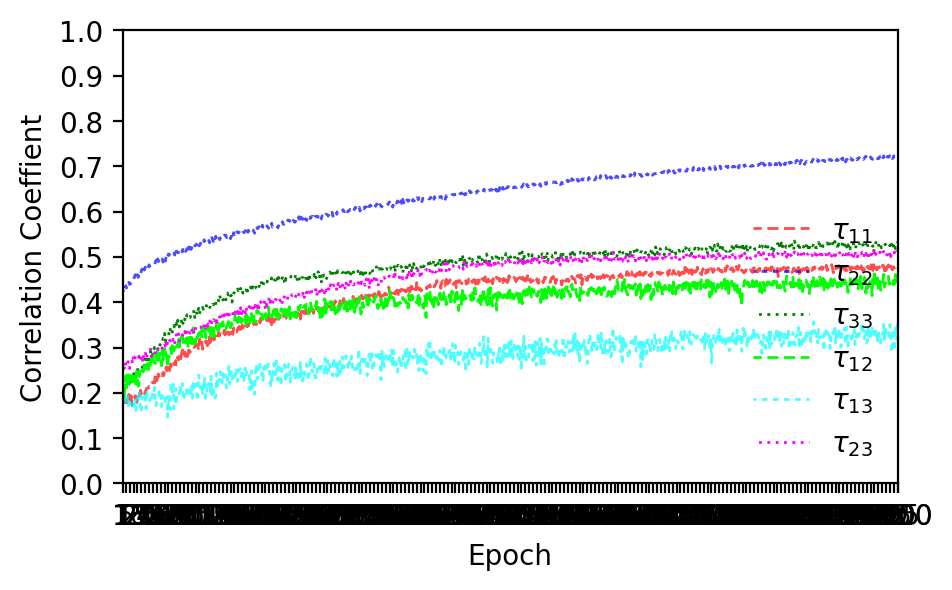

In [30]:
mpl.rcParams['text.usetex'] = False
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset

mpl.rcParams['figure.dpi'] = 200
fig, ax = plt.subplots(figsize = (5,3))

plot_epochs = 1000;

x_array = np.arange(1, plot_epochs+1)

ax.plot(x_array, history.history['cc_0'][0:plot_epochs], color='red',alpha=0.7,linestyle=(1, (4, 2)),label=r'$\tau_{11}$',linewidth=1)
ax.plot(x_array, history.history['cc_1'][0:plot_epochs],color='blue',alpha=0.7,linestyle=(1, (2, 2)),label=r'$\tau_{22}$',linewidth=1)
ax.plot(x_array, history.history['cc_2'][0:plot_epochs],color='green',linestyle=(1, (1, 2)),label=r'$\tau_{33}$',linewidth=1)
ax.plot(x_array, history.history['cc_3'][0:plot_epochs],color='lime',alpha=1,linestyle=(1, (4, 2)),label=r'$\tau_{12}$',linewidth=1)
ax.plot(x_array, history.history['cc_4'][0:plot_epochs],color='cyan',alpha=0.7,linestyle=(1, (2, 2)),label=r'$\tau_{13}$',linewidth=1)
ax.plot(x_array, history.history['cc_5'][0:plot_epochs],color='fuchsia',linestyle=(1, (1, 2)),label=r'$\tau_{23}$',linewidth=1)

plt.ylim(0,1)
plt.xlim(1,plot_epochs)

xticks = np.arange(0, plot_epochs+1, 5)
xticks = np.append(xticks, plot_epochs)
xticks = np.array([y for y in xticks if y != 0])
xticks = np.insert(xticks, 0, 1)
yticks = np.arange(0, 1.1, 0.1)
ax.set_xticks(ticks = xticks)
ax.set_yticks(ticks = yticks)

plt.ylabel("Correlation Coeffient")
plt.xlabel("Epoch")

ax.legend(frameon=False,loc='lower right')

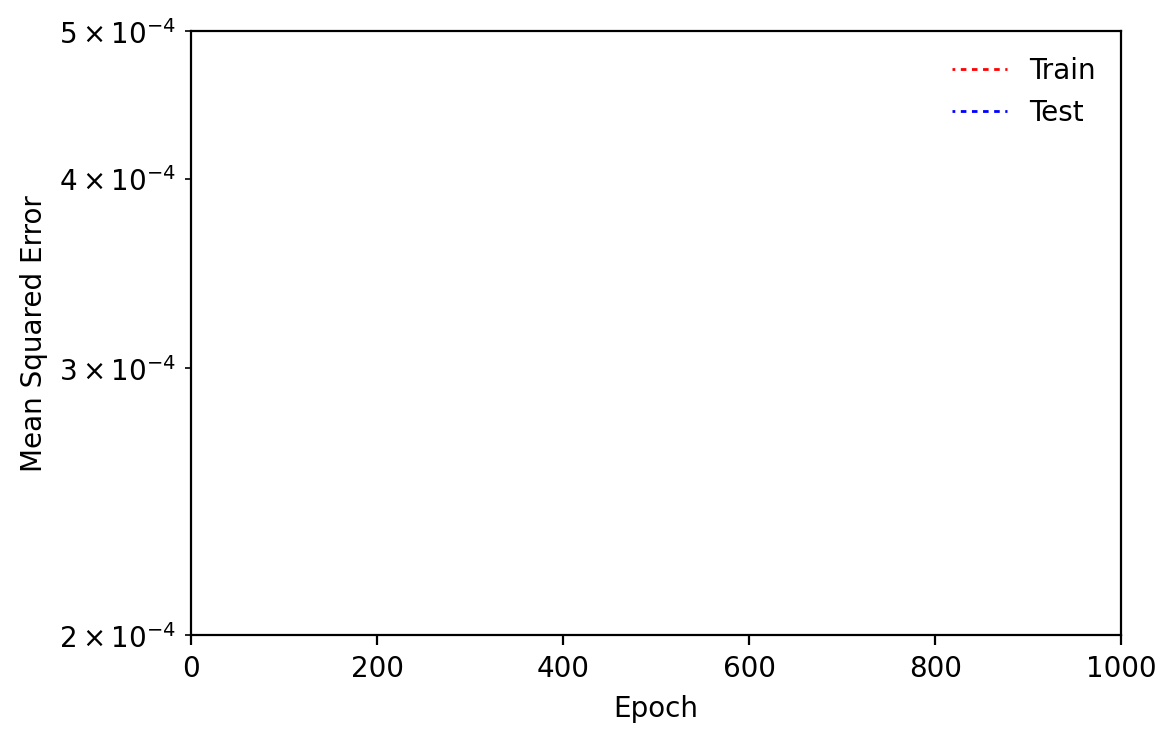

In [31]:
plt.plot(history.history['loss'], color='red', linestyle=(1, (2, 2)), label=r'Train', linewidth=1)
plt.plot(history.history['val_loss'], color='blue', linestyle=(1, (2, 2)), label=r'Test', linewidth=1)

# plt.loglog(history.history['loss'], color='red', linestyle=(1, (2, 2)), label=r'Train', linewidth=1)
# plt.loglog(history.history['val_loss'], color='blue', linestyle=(1, (2, 2)), label=r'Test', linewidth=1)

plt.ylim([0.0002,0.0005])
plt.yscale("log")
plt.xlim(0, plot_epochs)

ticks = np.arange(0, plot_epochs+1, 5)
ticks = np.append(ticks, plot_epochs)
ticks = np.array([y for y in ticks if y != 0])
ticks = np.insert(ticks, 0, 1)
ax.set_xticks(ticks = ticks)

plt.ylabel("Mean Squared Error")
plt.xlabel("Epoch")

plt.legend(frameon=False,loc='upper right')

plt.show()

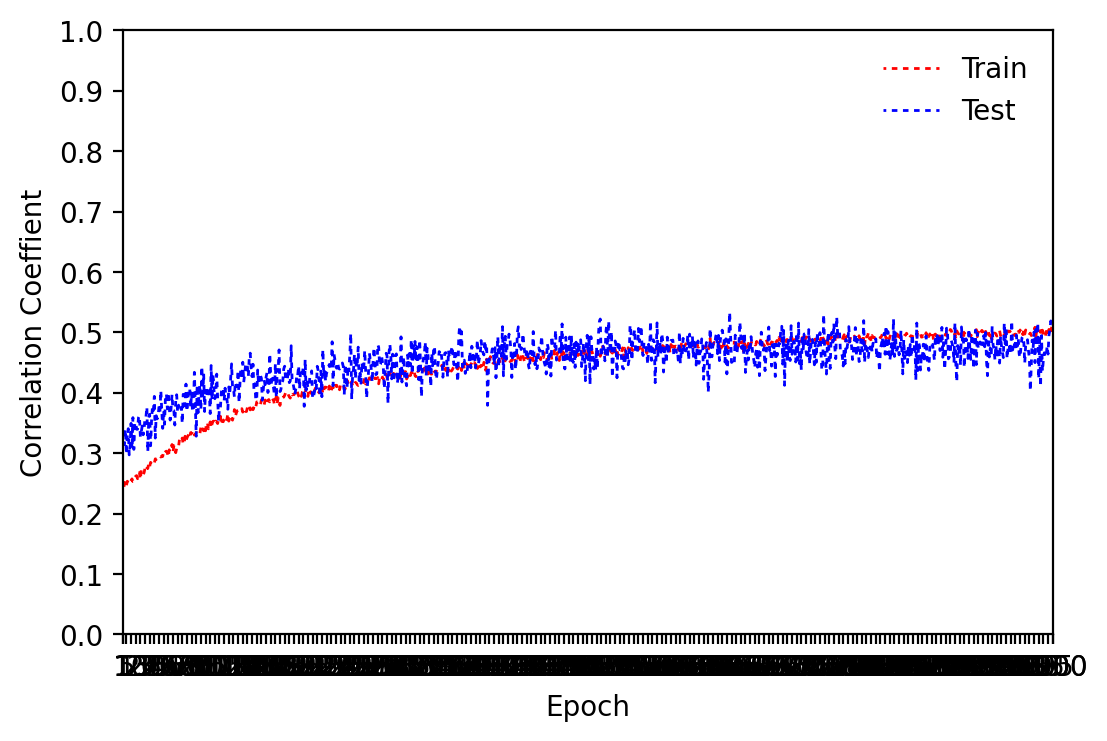

In [32]:
average_cc_train = np.mean([history.history['cc_0'],
                            history.history['cc_1'],
                            history.history['cc_2'],
                            history.history['cc_3'],
                            history.history['cc_4'],
                            history.history['cc_5']],
                           axis = 0)

average_cc_test = np.mean([history.history['val_cc_0'],
                            history.history['val_cc_1'],
                            history.history['val_cc_2'],
                            history.history['val_cc_3'],
                            history.history['val_cc_4'],
                            history.history['val_cc_5']],
                           axis = 0)

plt.plot(average_cc_train, color='red', linestyle=(1, (2, 2)), label=r'Train', linewidth=1)
plt.plot(average_cc_test, color='blue', linestyle=(1, (2, 2)), label=r'Test', linewidth=1)

# plt.loglog(history.history['loss'], color='red', linestyle=(1, (2, 2)), label=r'Train', linewidth=1)
# plt.loglog(history.history['val_loss'], color='blue', linestyle=(1, (2, 2)), label=r'Test', linewidth=1)

plt.ylim(0,1)
plt.xlim(1,plot_epochs)

xticks = np.arange(0, plot_epochs+1, 5)
xticks = np.append(ticks, plot_epochs)
xticks = np.array([y for y in ticks if y != 0])
xticks = np.insert(ticks, 0, 1)
yticks = np.arange(0, 1.1, 0.1)
plt.xticks(ticks = xticks)
plt.yticks(ticks = yticks)

plt.ylabel("Correlation Coeffient")
plt.xlabel("Epoch")

plt.legend(frameon=False,loc='upper right')

In [ ]:
# print(history.history['correlation_coefficient_theo'])

In [ ]:
# model.save("24_05_22_NN01.h5")

In [67]:
def freeze_session(session, keep_var_names=None, output_names=None, clear_devices=True):
    """
    Freezes the state of a session into a pruned computation graph.
    Creates a new computation graph where variable nodes are replaced by
    constants taking their current value in the session. The new graph will be
    pruned so subgraphs that are not necessary to compute the requested
    outputs are removed.
    @param session The TensorFlow session to be frozen.
    @param keep_var_names A list of variable names that should not be frozen,
                          or None to freeze all the variables in the graph.
    @param output_names Names of the relevant graph outputs.
    @param clear_devices Remove the device directives from the graph for better portability.
    @return The frozen graph definition.
    """
    graph = session.graph
    with graph.as_default():
        freeze_var_names = list(set(v.op.name for v in tf.global_variables()).difference(keep_var_names or []))
        output_names = output_names or []
        output_names += [v.op.name for v in tf.global_variables()]
        input_graph_def = graph.as_graph_def()
        if clear_devices:
            for node in input_graph_def.node:
                node.device = ""
        frozen_graph = tf.graph_util.convert_variables_to_constants(
            session, input_graph_def, output_names, freeze_var_names)
        return frozen_graph
    
frozen_graph = freeze_session(K.get_session(), output_names=[out.op.name for out in model.outputs])
tf.train.write_graph(frozen_graph, './', '29_05_21_NN01.pb', as_text=False)

Instructions for updating:
Use `tf.compat.v1.graph_util.convert_variables_to_constants`
Instructions for updating:
Use `tf.compat.v1.graph_util.extract_sub_graph`


'./29_05_21_NN01.pb'

In [ ]:
Xt = np.array([[15.108, 5.39327, -6.04762, 12.0882, -7.9697, -17.251, 6.47427, 3.87336, -10.3209]])
print(np.shape(Xt))
Yt_predict = model.predict(Xt)
print(Yt_predict)

In [ ]:
model.outputs[0]